[data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29)

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

In [74]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import sklearn

from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

%matplotlib inline
sns.set_style('white')

In [75]:
cancer = pd.read_csv('breast-cancer-wisconsin.data', header=None)

cancer.columns = ['id_number', 'clump_thickness', 'cell_size_uniformity',
                  'cell_shape_uniformity', 'marginal_adhesion', 'single_epithelial_cell_size',
                  'bare_nuclei', 'bland_chromatin', 'normal_nuclei',
                  'mitosis', 'class']

cancer = cancer[cancer.bare_nuclei != '?']
cancer['bare_nuclei'] = pd.to_numeric(cancer.bare_nuclei)
print(cancer.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
id_number                      683 non-null int64
clump_thickness                683 non-null int64
cell_size_uniformity           683 non-null int64
cell_shape_uniformity          683 non-null int64
marginal_adhesion              683 non-null int64
single_epithelial_cell_size    683 non-null int64
bare_nuclei                    683 non-null int64
bland_chromatin                683 non-null int64
normal_nuclei                  683 non-null int64
mitosis                        683 non-null int64
class                          683 non-null int64
dtypes: int64(11)
memory usage: 64.0 KB
None


In [76]:
#feature engineering
cancer['th_si_sh'] = cancer.clump_thickness * cancer.cell_size_uniformity * cancer.cell_shape_uniformity
cancer['bn_si_sh'] = cancer.bare_nuclei * cancer.cell_size_uniformity * cancer.cell_shape_uniformity

,id_number,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nuclei,mitosis,class,th_si_sh,bn_si_sh
id_number,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701,-0.029775,-0.047505
clump_thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790,0.687217,0.520580
cell_size_uniformity,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801,0.883224,0.840446
cell_shape_uniformity,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891,0.883937,0.853882
marginal_adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294,0.587349,0.646164
single_epithelial_cell_size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958,0.676274,0.648721
bare_nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696,0.568199,0.761495
bland_chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228,0.647956,0.664410
normal_nuclei,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677,0.620416,0.587133
mitosis,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448,0.443671,0.417476


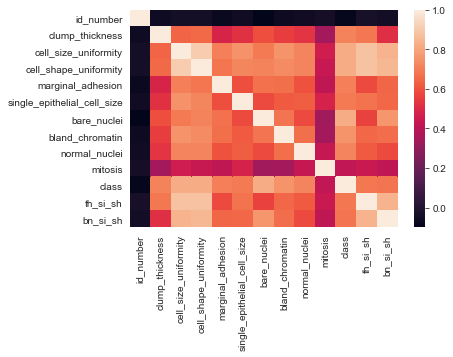

In [77]:
display(cancer.corr())

sns.heatmap(cancer.corr())

plt.show()

In [78]:
X = cancer.drop('class', axis=1)
y = cancer['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [81]:
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, y_train)

print('Train accuracy:\n ', lass.score(X_train, y_train))
print('Test accuracy:\n ', lass.score(X_test, y_test))
cvs = cross_val_score(lass , X, y, cv=5)
print('Cross Validation Score:\n {} +/- {}'.format(round(cvs.mean(),6),round(cvs.std(),6)))

Train accuracy:
  0.7815263701340899
Test accuracy:
  0.7223110094685088
Cross Validation Score:
 0.757441 +/- 0.091075


In [82]:
params = { 'n_estimators' : 3000,
           'loss' : 'ls' , 
           'learning_rate' : 0.1
}

gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(X_train,y_train)

print('Train accuracy:\n ', gbr.score(X_train, y_train))
print('Test accuracy:\n ', gbr.score(X_test, y_test))
cvs = cross_val_score(gbr , X, y, cv=5)
print('Cross Validation Score:\n {} +/- {}'.format(round(cvs.mean(),6),round(cvs.std(),6)))

Train accuracy:
  0.999999888826045
Test accuracy:
  0.8693958692658645
Cross Validation Score:
 0.851903 +/- 0.041047


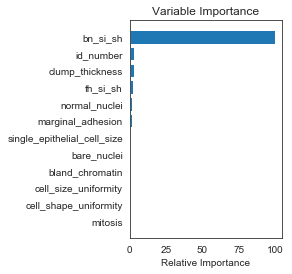

In [83]:

feature_importance = gbr.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()